In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Create figures folder
os.makedirs('../reports/figures', exist_ok=True)

# Load the localized dataset
df=pd.read_csv('../data/processed/engineered.csv')
print("Dataset shape:", df.shape)
print("\nClasses:", df['label'].unique())
print("\nClass distribution:\n", df['label'].value_counts())

Dataset shape: (3867, 12)

Classes: <StringArray>
[    'Barley',       'Bean',    'Dagussa',     'Fallow',      'Maize',
 'Niger seed',        'Pea',     'Potato', 'Red Pepper',    'Sorghum',
       'Teff',      'Wheat']
Length: 12, dtype: str

Class distribution:
 label
Teff          1260
Maize          732
Wheat          715
Barley         503
Bean           253
Pea             94
Sorghum         72
Dagussa         71
Niger seed      64
Potato          48
Red Pepper      29
Fallow          26
Name: count, dtype: int64


/tmp/ipykernel_59808/1111685492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='label',order=df['label'].value_counts().index, palette='viridis')


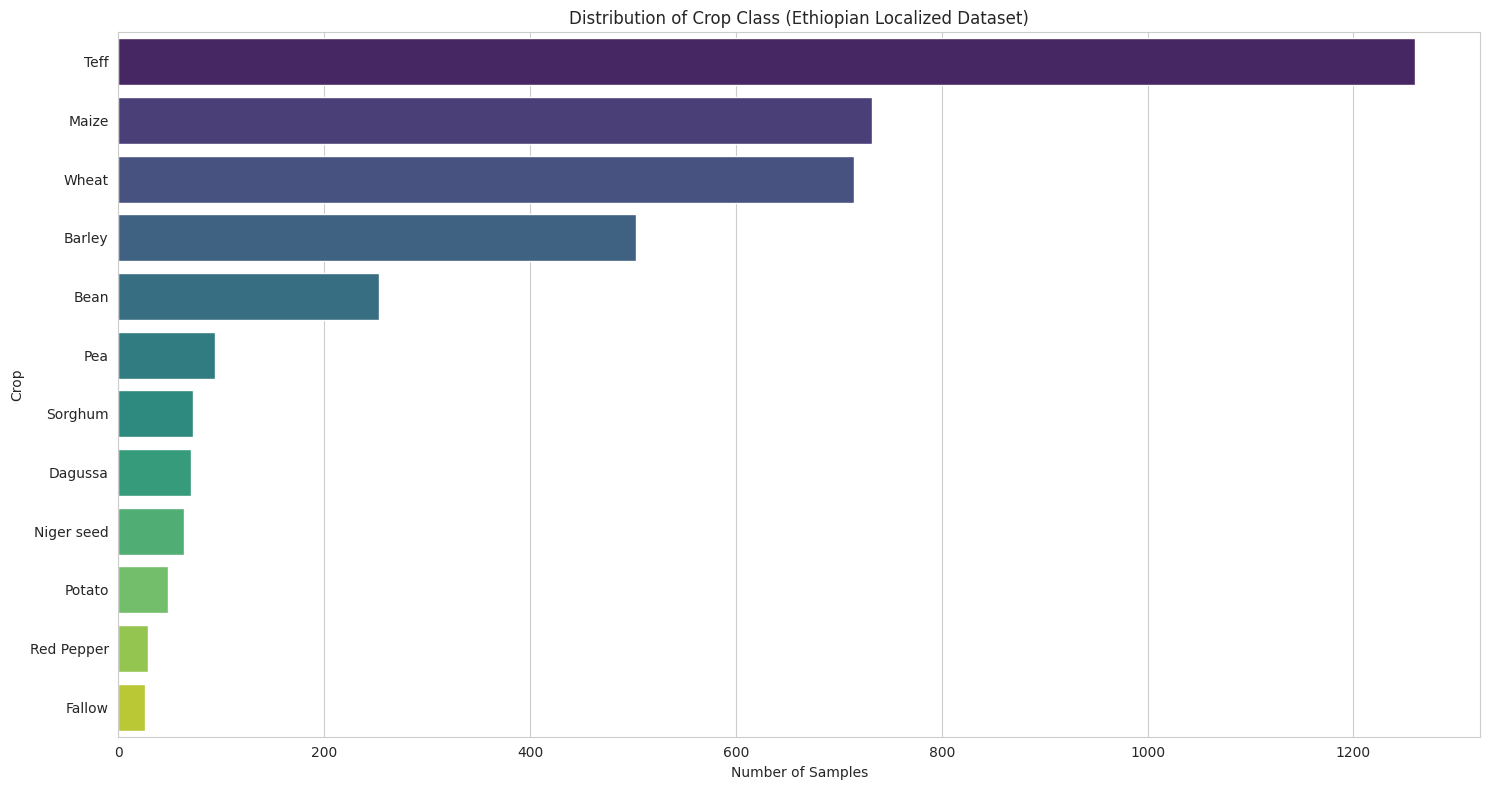

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,y='label',order=df['label'].value_counts().index, palette='viridis')
plt.title('Distribution of Crop Class (Ethiopian Localized Dataset)')
plt.xlabel("Number of Samples")
plt.ylabel("Crop")
plt.tight_layout()
plt.savefig('../reports/figures/class_distribution.png')
plt.show()

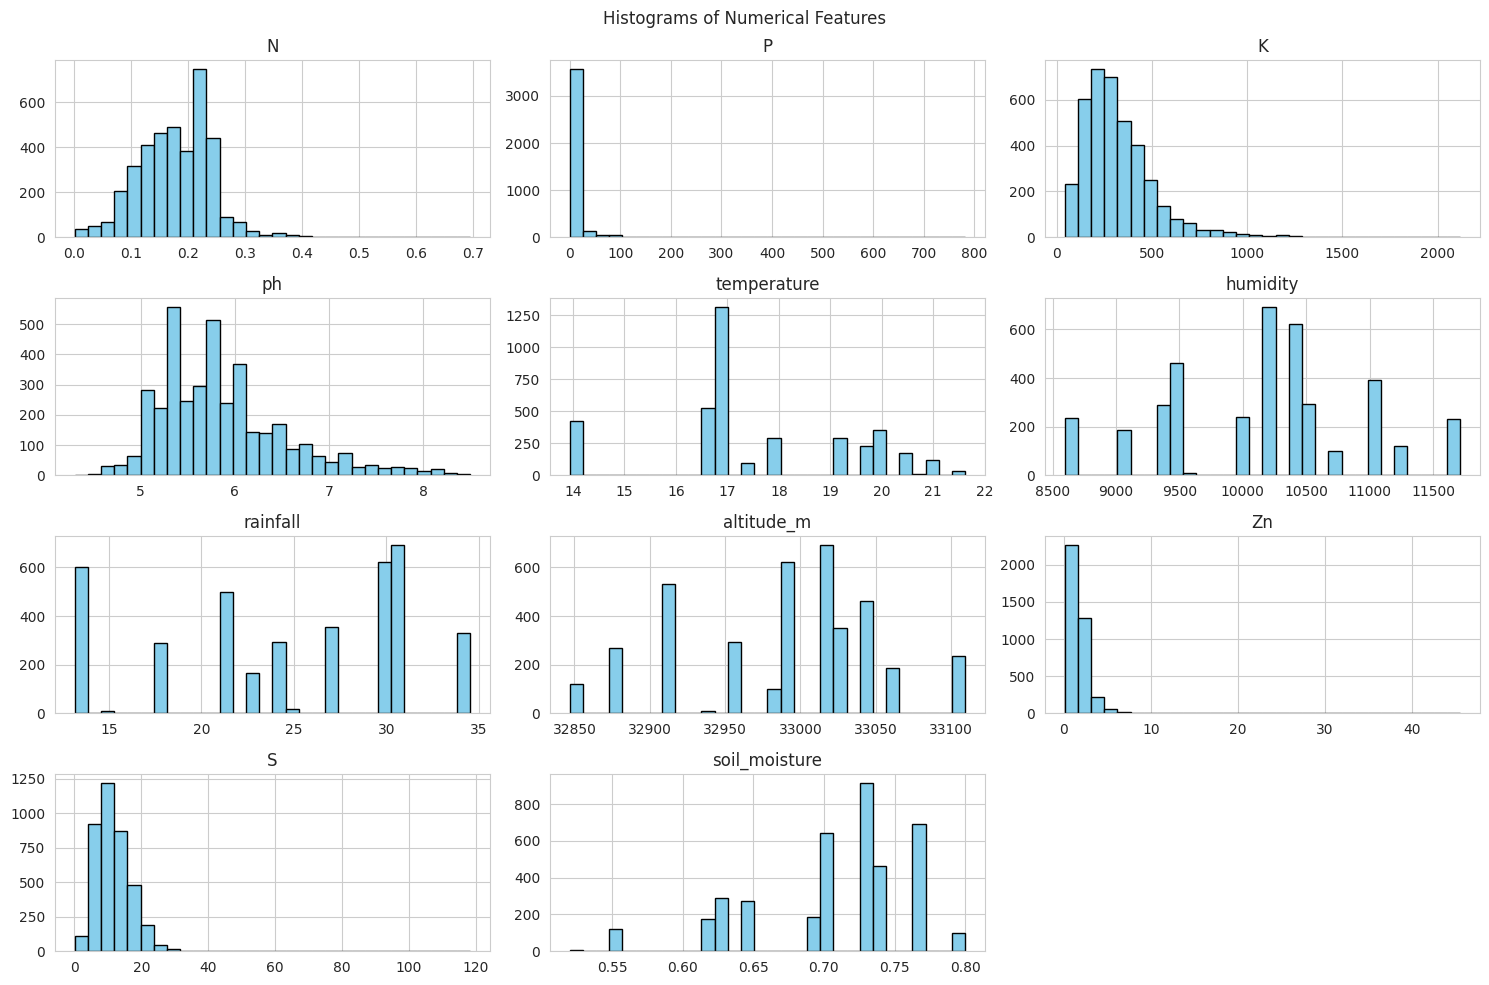

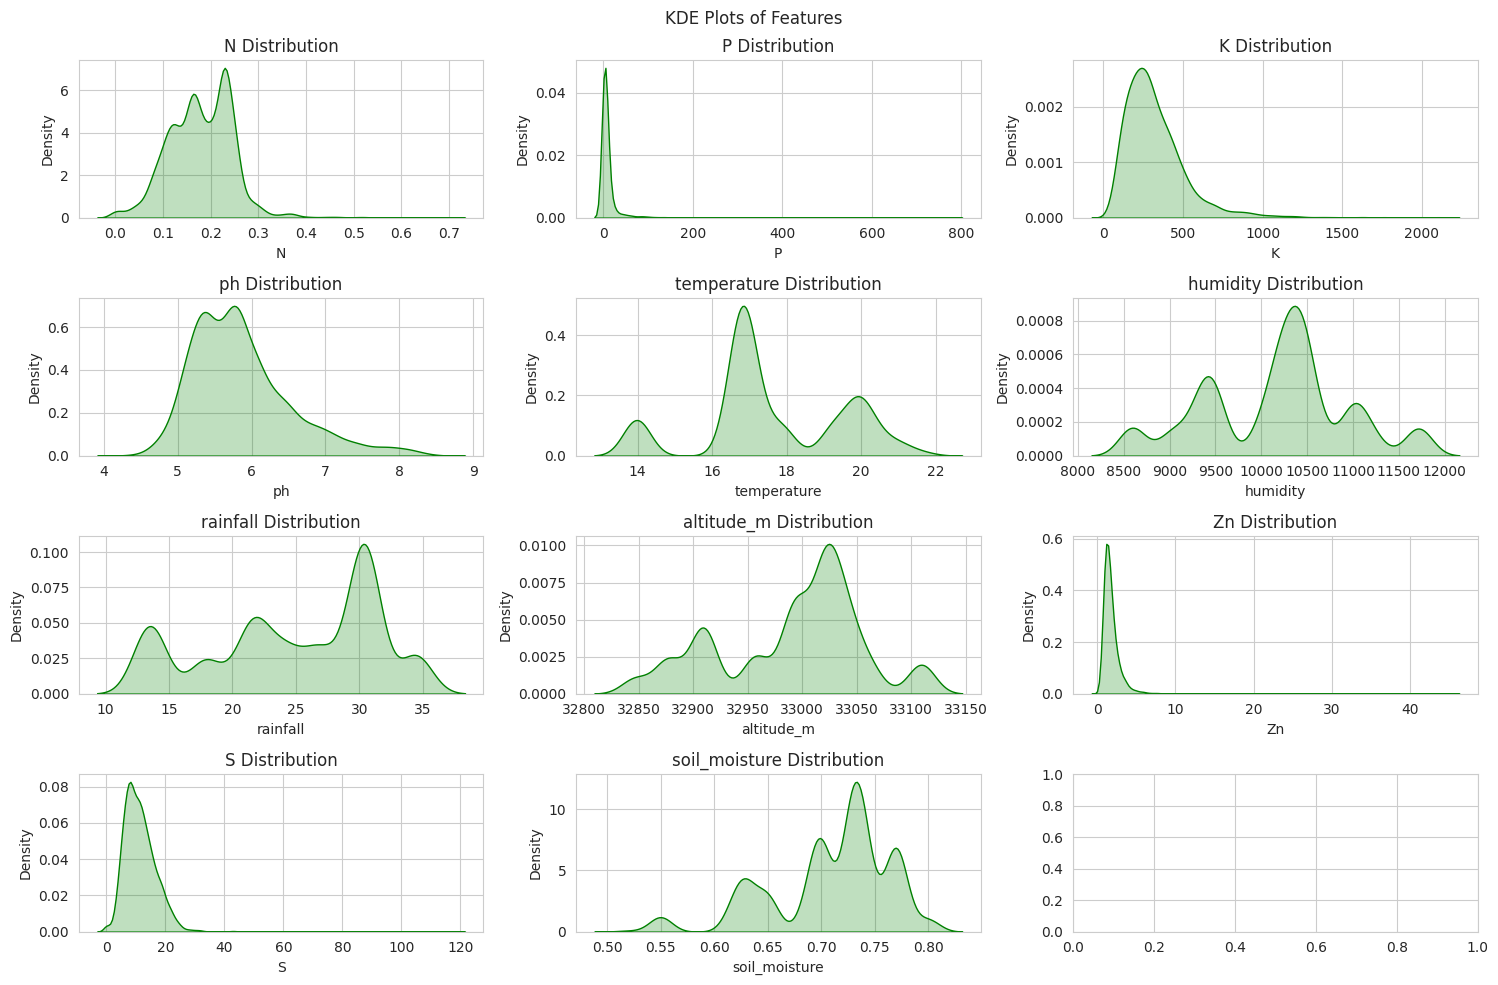

In [8]:
features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall', 
                'altitude_m', 'Zn', 'S', 'soil_moisture']

df[features].hist(bins=30, figsize=(15, 10), layout=(4, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.savefig('../reports/figures/feature_histograms.png')
plt.show()

# Overlay KDE for better distribution view
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feat in enumerate(features):
    sns.kdeplot(df[feat], ax=axes[i], fill=True, color='green')
    axes[i].set_title(f'{feat} Distribution')
plt.suptitle('KDE Plots of Features')
plt.tight_layout()
plt.savefig('../reports/figures/feature_kde.png')
plt.show()

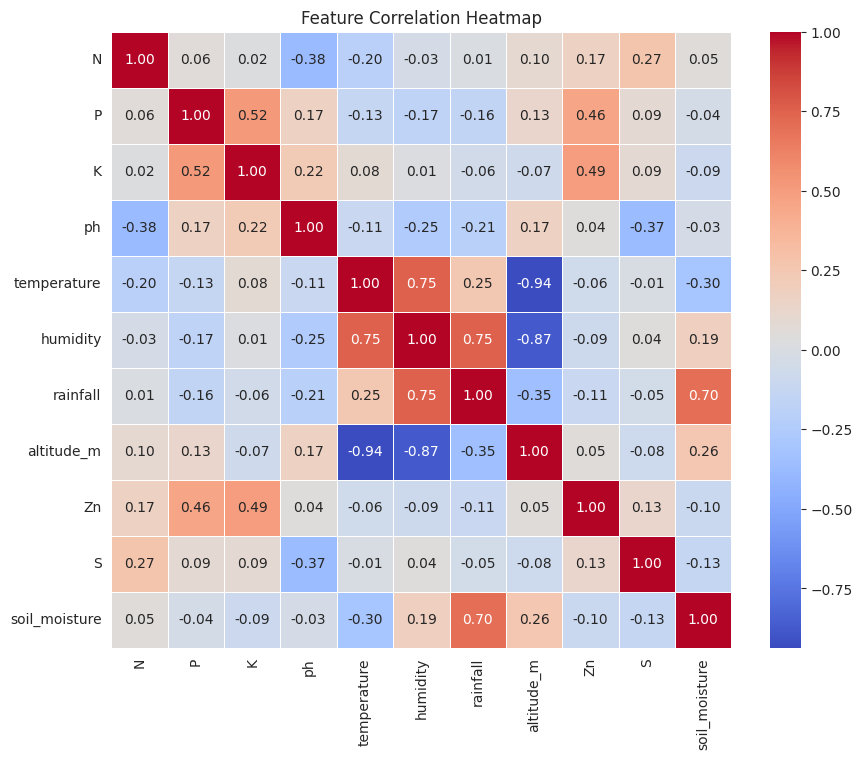

In [9]:
plt.figure(figsize=(10,8))
corr=df[features].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('../reports/figures/correlation_heatmap.png')
plt.show()

/tmp/ipykernel_59808/1670175321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='temperature', y='label', palette='Set3')


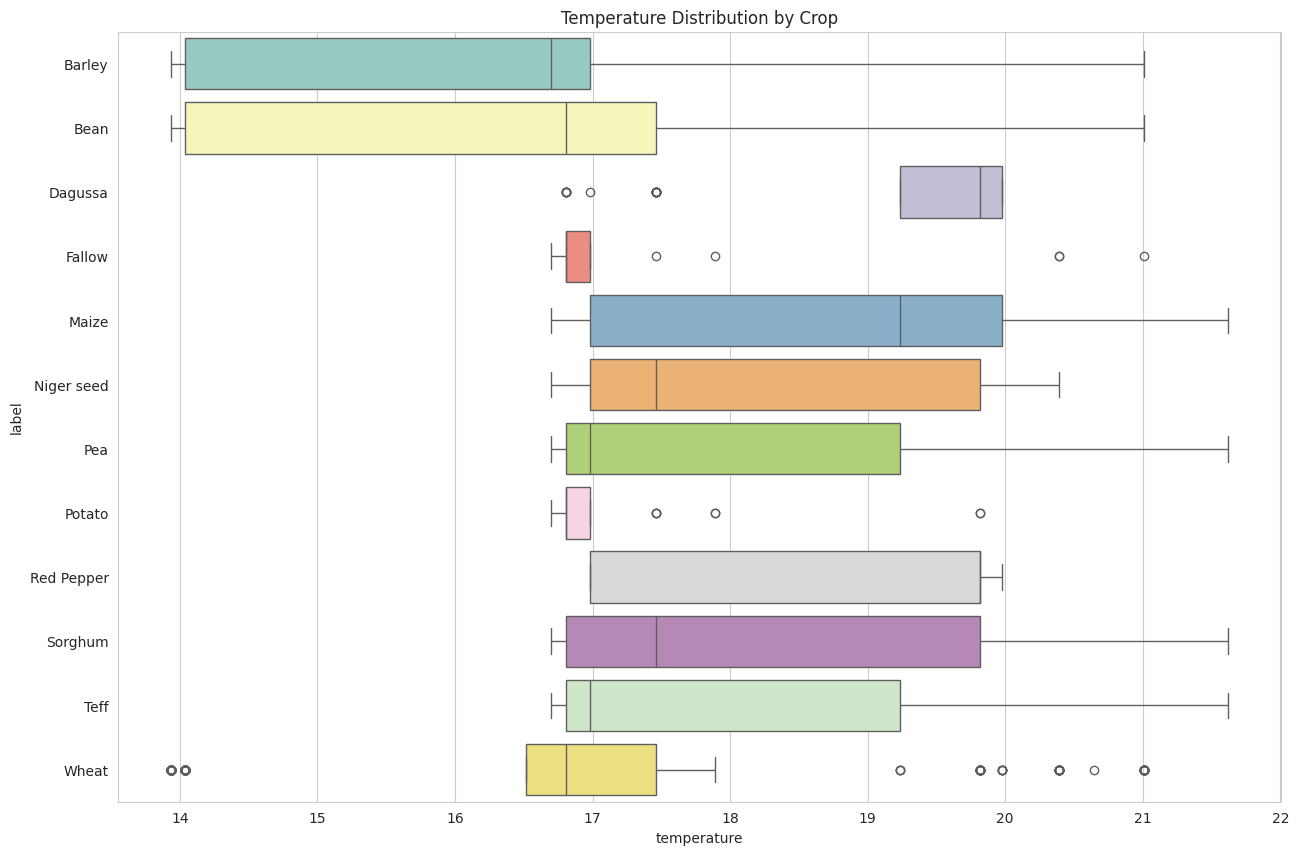

/tmp/ipykernel_59808/1670175321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rainfall', y='label', palette='Set3')


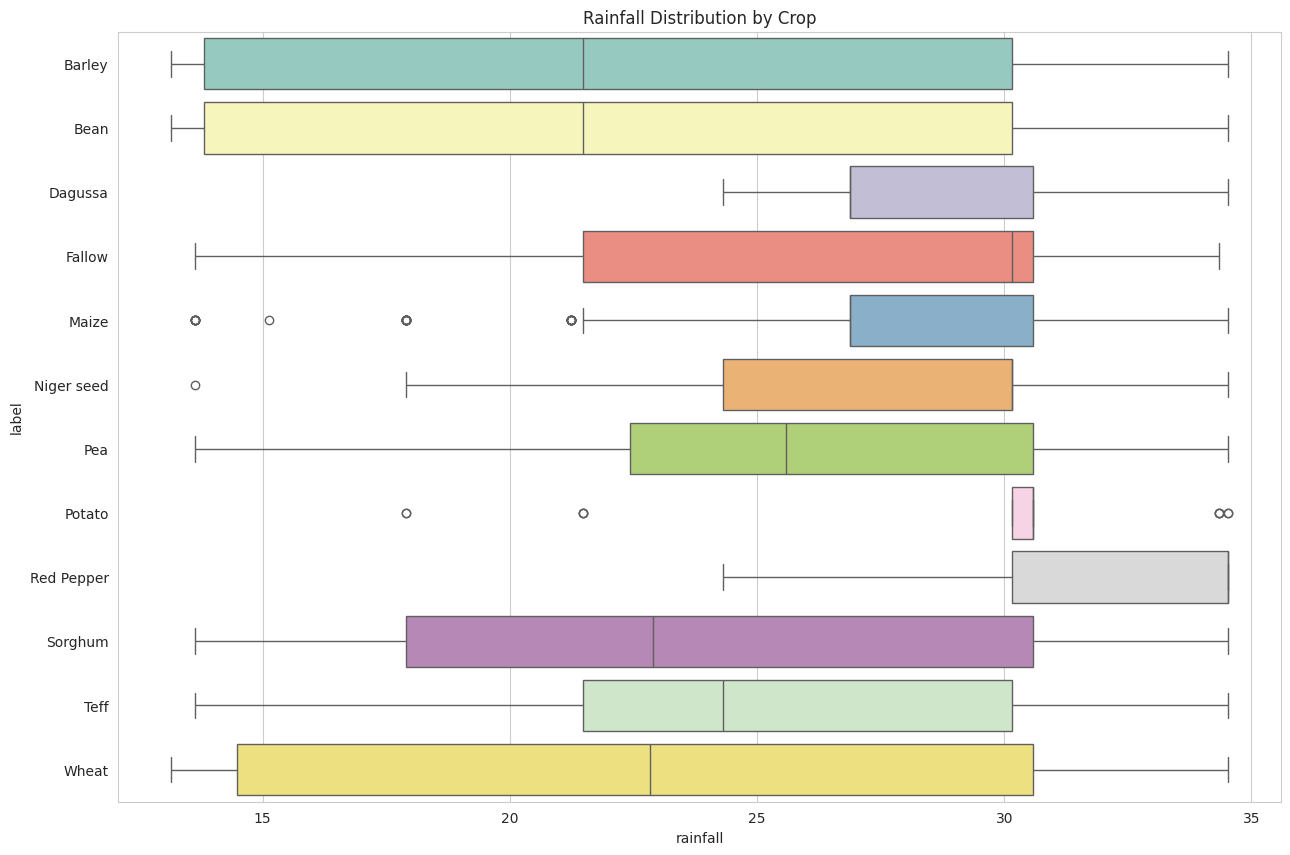

/tmp/ipykernel_59808/1670175321.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ph', y='label', palette='Set3')


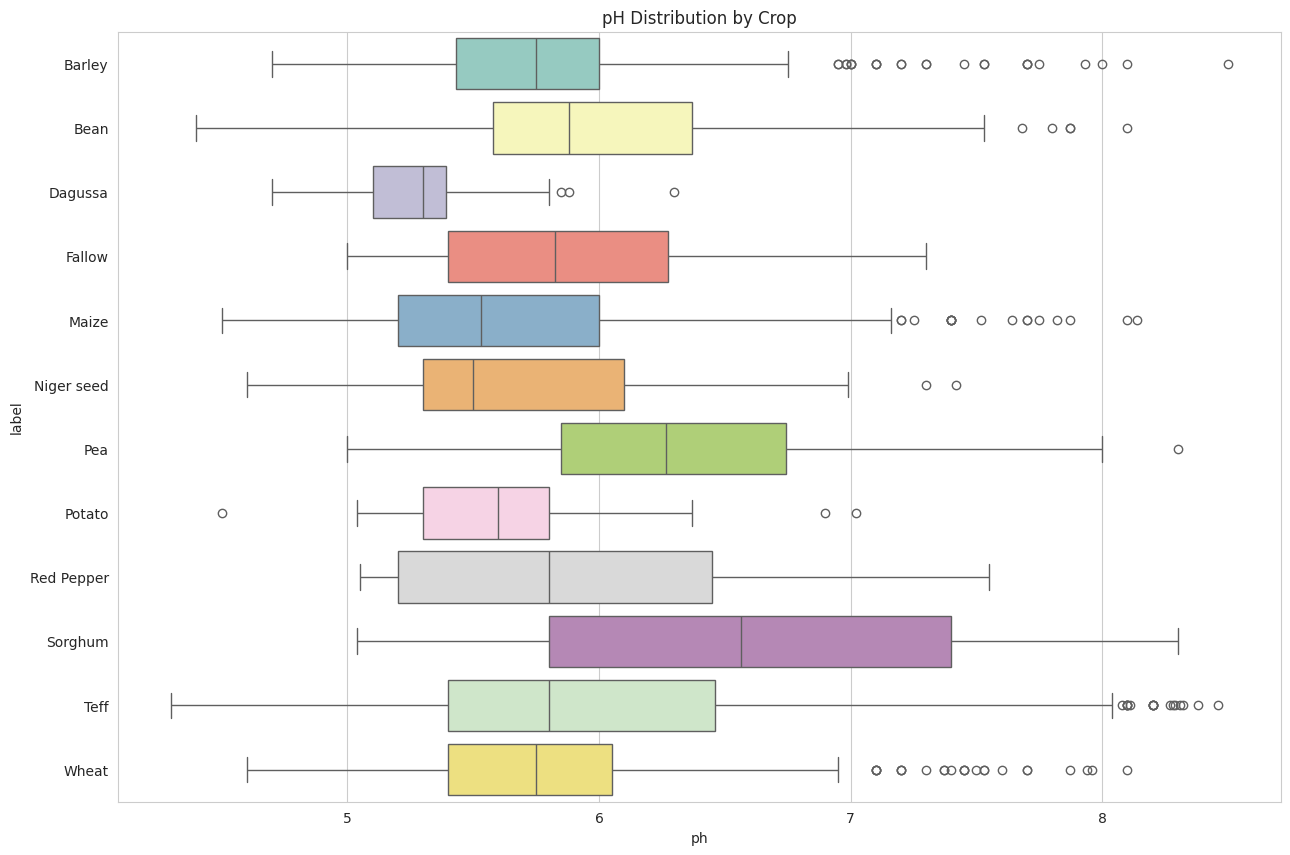

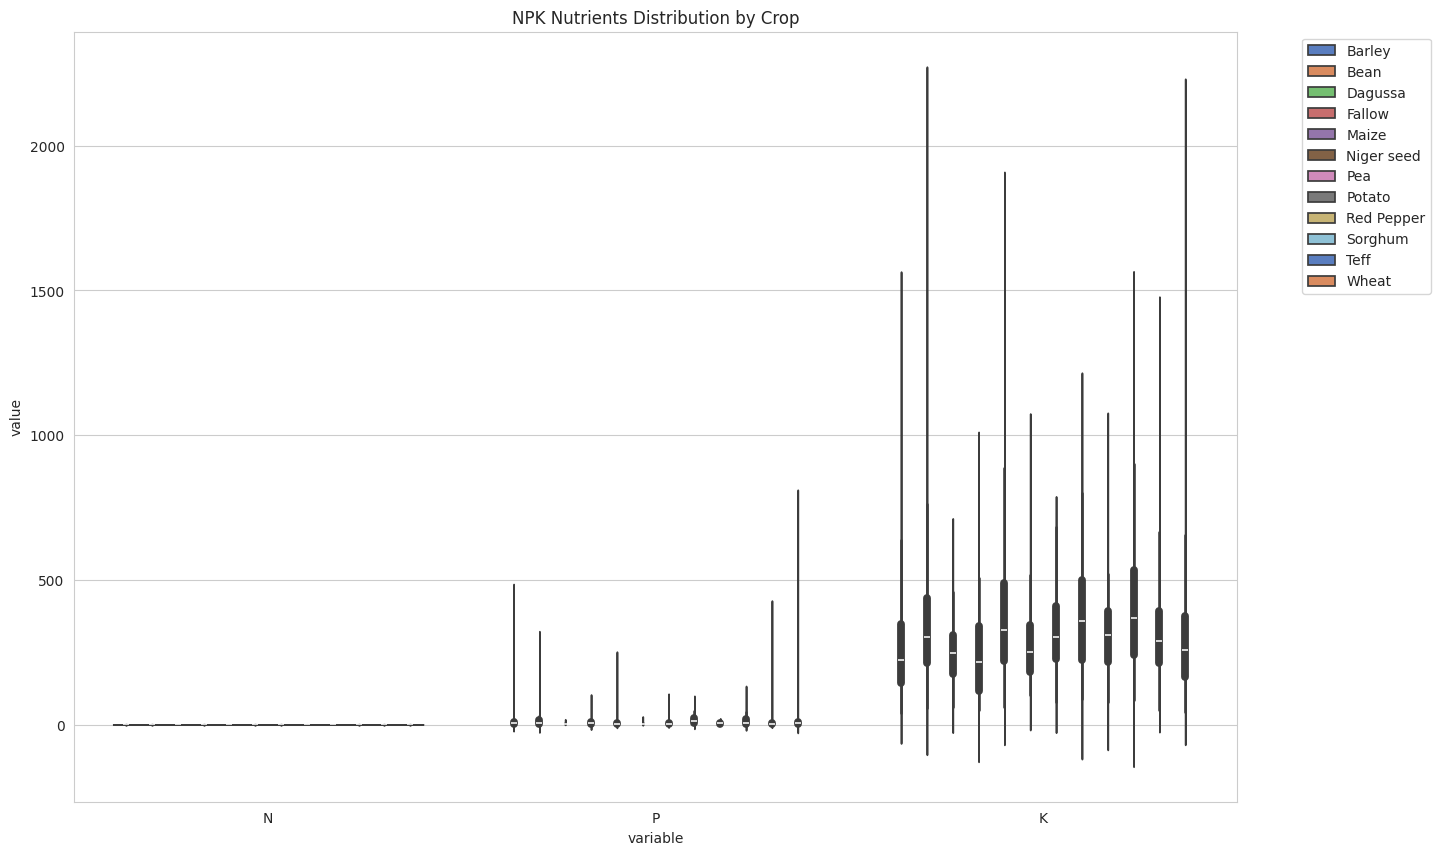

In [10]:
# Temperature by Crop (highland vs lowland separation)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='temperature', y='label', palette='Set3')
plt.title('Temperature Distribution by Crop')
plt.savefig('../reports/figures/temp_by_crop.png')
plt.show()

# Rainfall by Crop
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='rainfall', y='label', palette='Set3')
plt.title('Rainfall Distribution by Crop')
plt.savefig('../reports/figures/rainfall_by_crop.png')
plt.show()

# pH by Crop
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='ph', y='label', palette='Set3')
plt.title('pH Distribution by Crop')
plt.savefig('../reports/figures/ph_by_crop.png')
plt.show()

# NPK (can do violin for variety)
plt.figure(figsize=(15, 10))
sns.violinplot(data=df.melt(id_vars='label', value_vars=['N','P','K']), 
               x='variable', y='value', hue='label', palette='muted')
plt.title('NPK Nutrients Distribution by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../reports/figures/npk_violin.png')
plt.show()

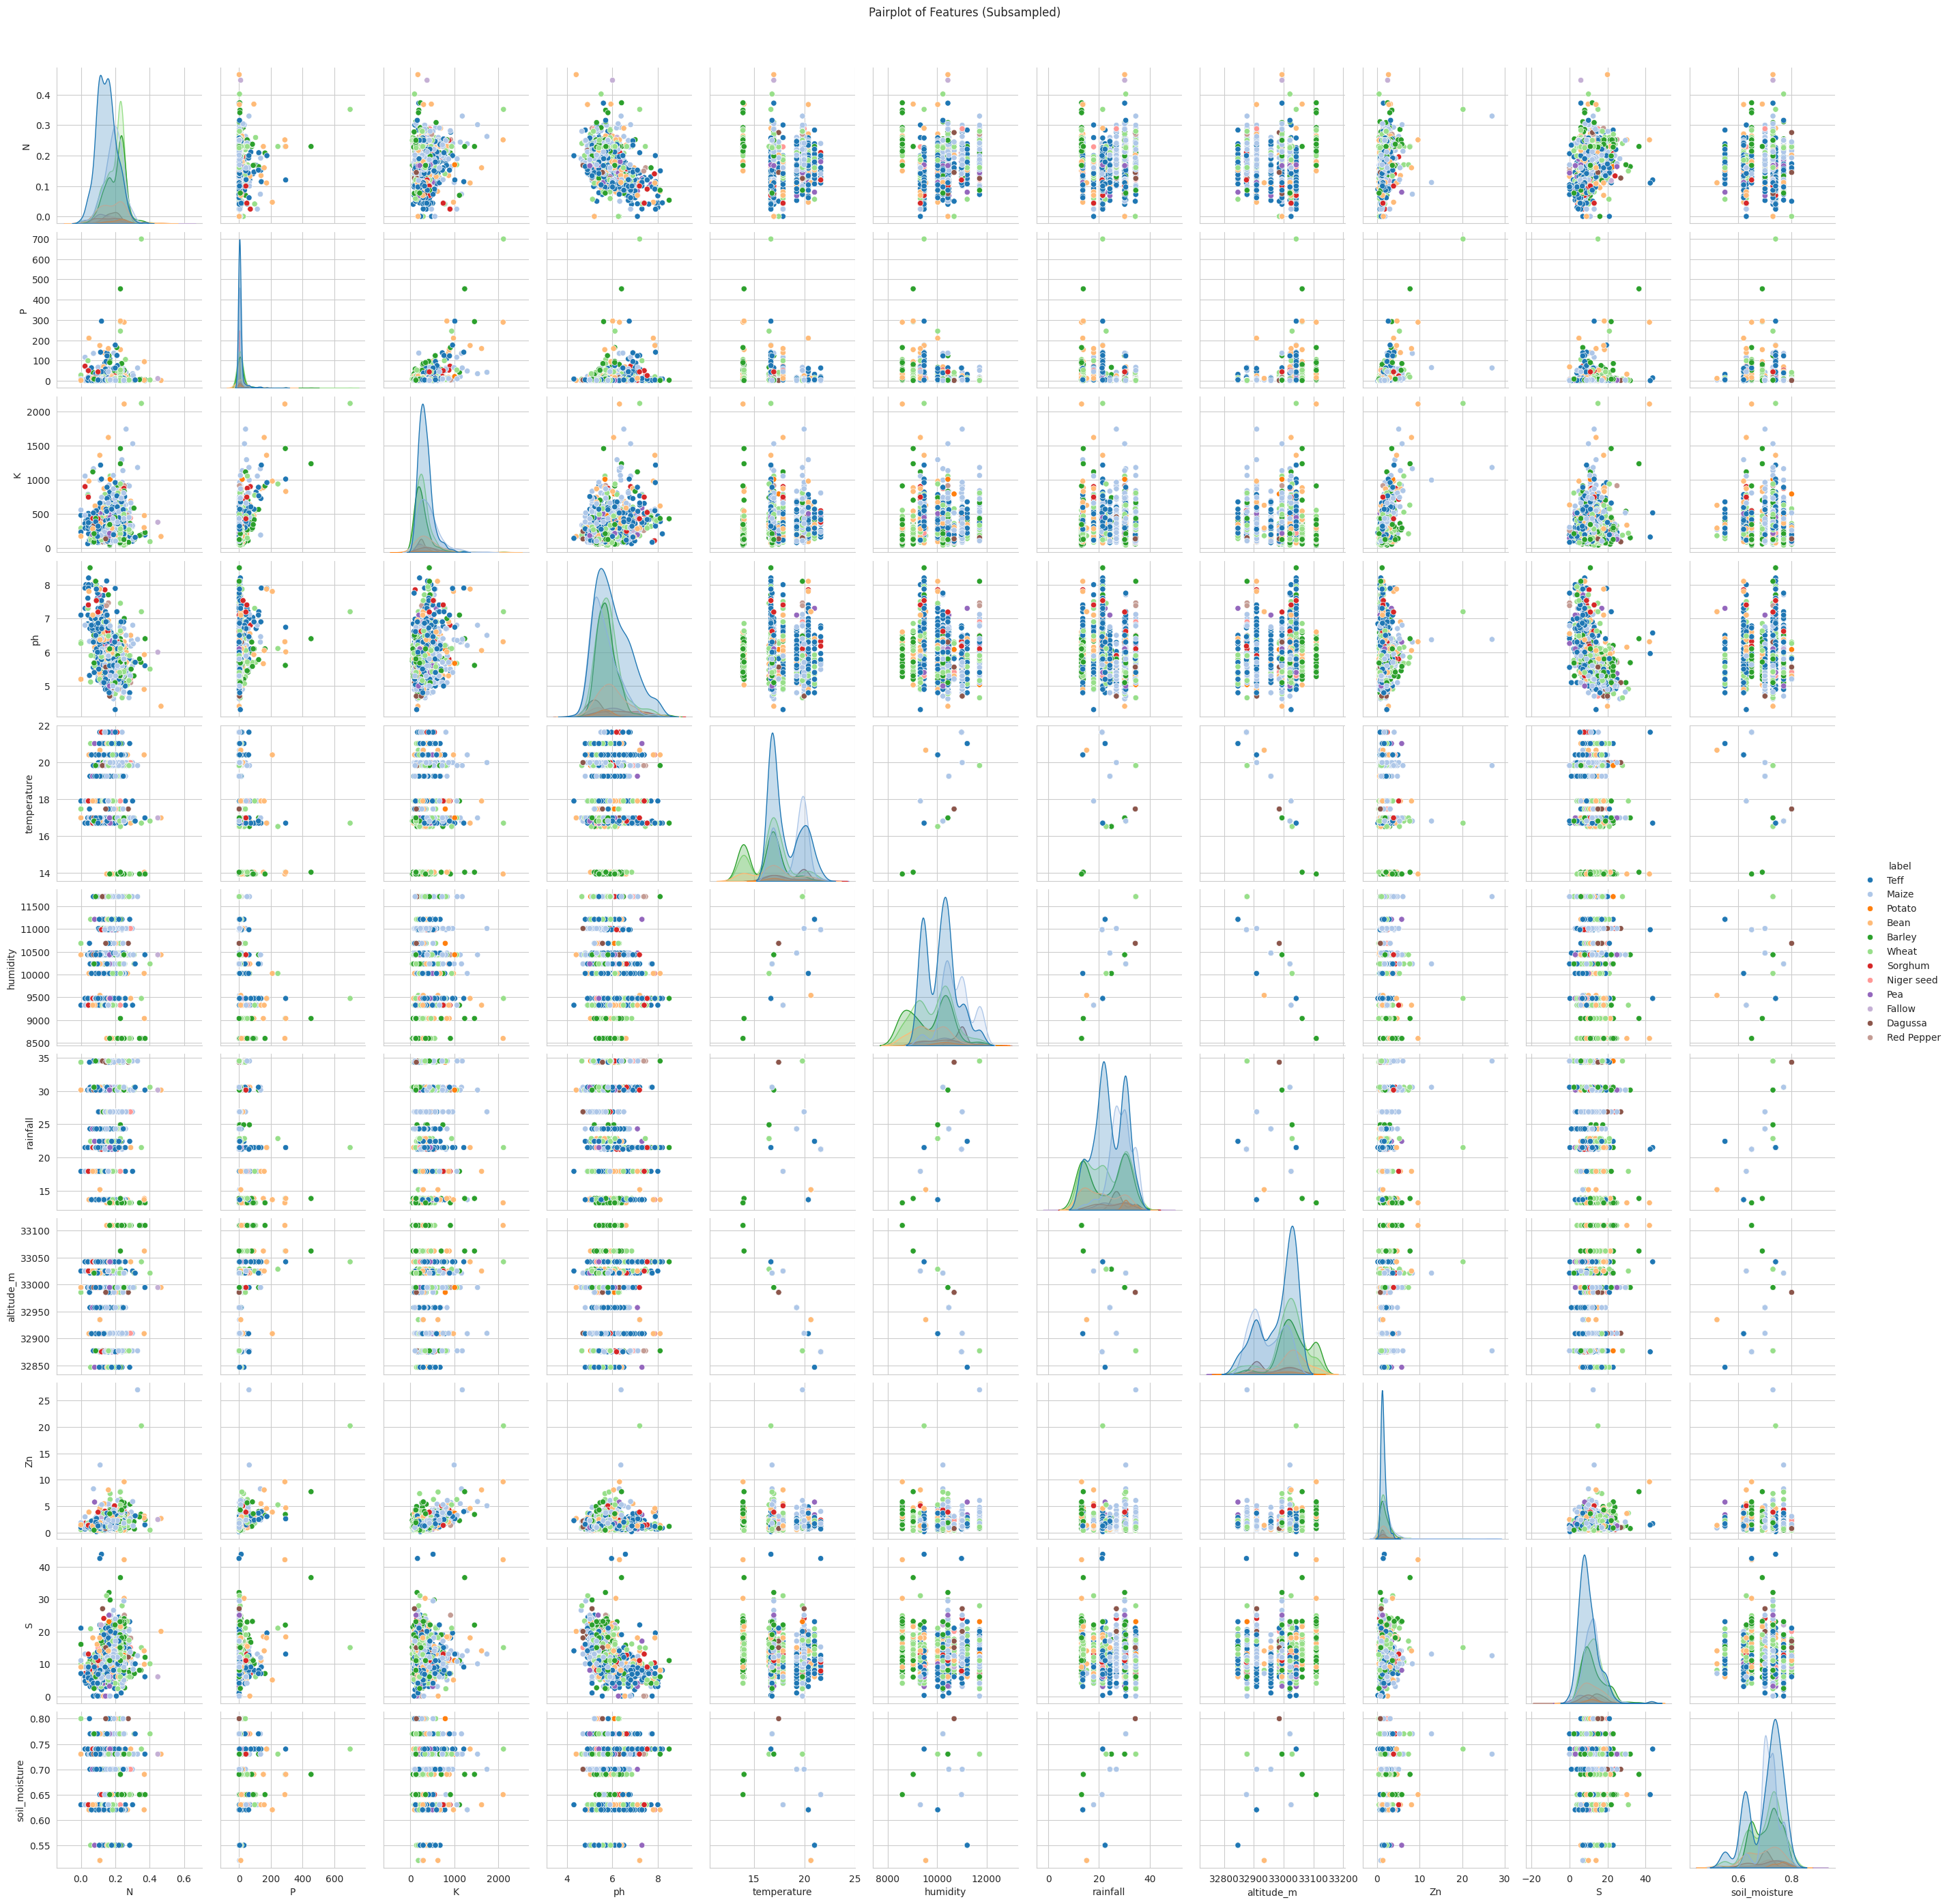

In [11]:
# Subsample for speed (or select key crops/features)
sample_df = df.sample(frac=0.3, random_state=42)  # 30% for faster plot

sns.pairplot(sample_df, hue='label', vars=features, diag_kind='kde', palette='tab20')
plt.suptitle('Pairplot of Features (Subsampled)', y=1.02)
plt.savefig('../reports/figures/pairplot_subsampled.png')
plt.show()

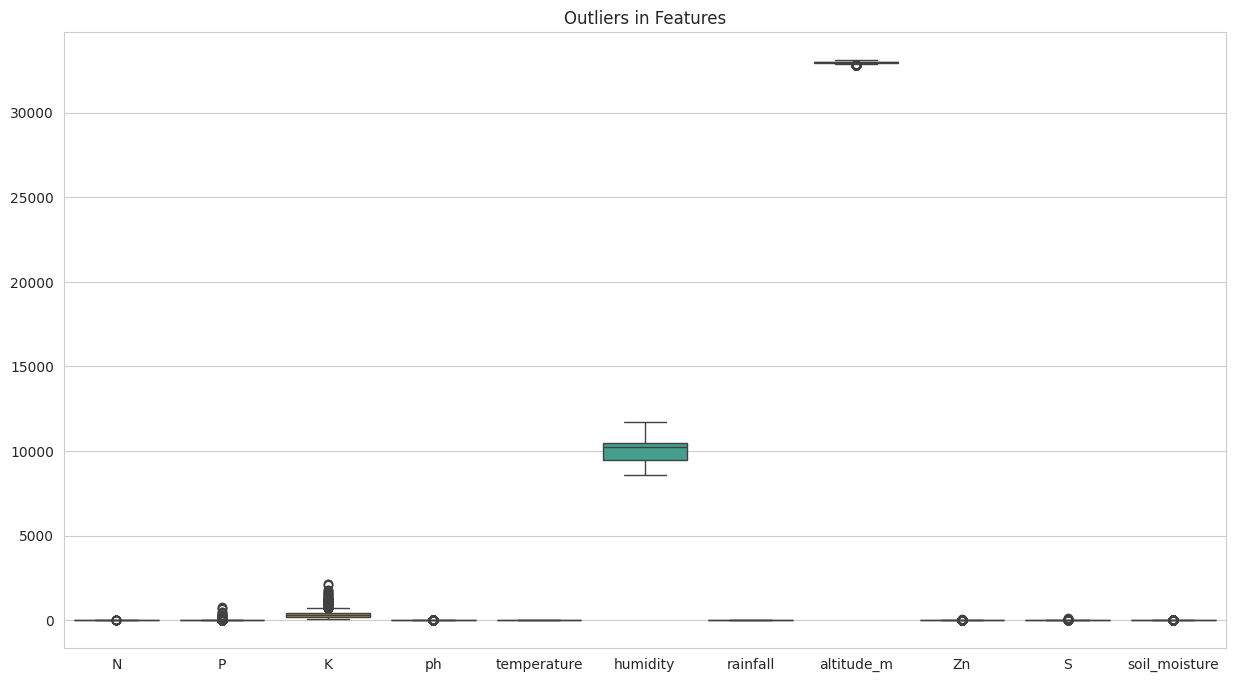

                 N            P            K           ph  temperature  \
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000   
mean      0.179153    11.349588   324.284770     5.857295    17.606446   
std       0.066476    34.141864   202.250133     0.676690     1.907104   
min       0.000262     0.000000    41.134000     4.300000    13.937083   
25%       0.131200     2.000000   191.000000     5.390000    16.807500   
50%       0.179884     4.000000   282.000000     5.780000    16.979167   
75%       0.230000     7.920000   405.000000     6.200000    19.236250   
max       0.695600   782.000000  2119.000000     8.500000    21.620000   

           humidity     rainfall    altitude_m           Zn            S  \
count   3867.000000  3867.000000   3867.000000  3867.000000  3867.000000   
mean   10163.036377    24.859453  32990.465662     1.774094    11.311625   
std      774.802239     6.647032     65.144229     1.460809     5.542094   
min     8595.000001    13.153

In [12]:
# Outliers check (boxplot all features)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features])
plt.title('Outliers in Features')
plt.savefig('../reports/figures/outliers.png')
plt.show()

# Summary stats
print(df[features].describe())

In [ ]:
top_features = feat_imp.head(10).index.tolist()
X_train_top = X_train[:, :][:, X.columns.isin(top_features)]  # Adjust indexing
